In [1]:
import pandas as pd

In [2]:
baseball = pd.read_csv("baseball.csv")

In [3]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [4]:
moneyball = baseball[baseball['Year'] < 2002]

In [5]:
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 15 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      154 non-null float64
RankPlayoffs    154 non-null float64
G               902 non-null int64
OOBP            90 non-null float64
OSLG            90 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 112.8+ KB


#### Since wins are based on Runs scored (RS) and Runs allowed (RA), let's calculate the difference between them.

In [6]:
moneyball['RD'] = moneyball['RS'] - moneyball['RA']

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 16 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      154 non-null float64
RankPlayoffs    154 non-null float64
G               902 non-null int64
OOBP            90 non-null float64
OSLG            90 non-null float64
RD              902 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 119.8+ KB


In [8]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#### It seems there is a strong correlation between Runs Difference and the number of Wins (W)

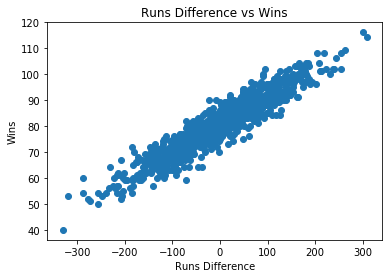

In [10]:
plt.scatter(moneyball['RD'], moneyball['W'])
plt.xlabel('Runs Difference')
plt.ylabel('Wins')
plt.title('Runs Difference vs Wins')

In [11]:
from sklearn import linear_model

In [13]:
linearRegression = linear_model.LinearRegression()

In [14]:
X_train = moneyball[['RD']]
y_train = moneyball[['W']]

In [16]:
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("Coefficients ", linearRegression.coef_)

Coefficients  [[ 0.10576562]]


In [18]:
print("Intercept ", linearRegression.intercept_)

Intercept  [ 80.88137472]


#### Basically, this means W = 0.1058(RD) + 80.8814
#### Claim : The number of wins should be >= 95
#### So, 0.1058(RD) + 80.8814 >= 95
#### RD = (95 - 80.8814)/0.1058 = 133.44612, approximately equal to 135 (claim made by Paul for the teams to make it to the playoffs)